# Toxic Dataset with Linear Model & Word2Vec
We will use Word2Vec to encode the sentence, and method of DAN to calculate.

## Dependencies

In [1]:
# BASICS
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# DATA
from data.process_data import load_train_data, load_test_data, load_data
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from gensim.models import Word2Vec

# MODEL
import torch
from torch import nn
import torch.nn.functional as F
from sklearn.linear_model import LogisticRegression

# EVALUATIONS
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package punkt to /home/keyulong/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/keyulong/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [2]:
# helper function
def plot_cm(y_test, y_test_pred, name, labels=[1, 2, 3, 4, 5]):
    # plot confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    cm_df = pd.DataFrame(cm, index=labels, columns=labels)
    
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm_df, annot=True, cmap=plt.get_cmap('Blues'), fmt="d")
    plt.title("Confusion Matrix of " + name)
    plt.ylabel('Actual Values')
    plt.xlabel('Predicted Values')
    plt.show()

## Loading Data & Train Word2Vec

In [3]:
%%time
X_train, X_test, y_train, y_test = load_data()

CPU times: user 2min 22s, sys: 674 ms, total: 2min 22s
Wall time: 2min 22s


In [4]:
# Construct indexer
sentences = []
for sentence in tqdm(X_test):
    sentences.append(word_tokenize(sentence.lower()))
for sentence in tqdm(X_train):
    sentences.append(word_tokenize(sentence.lower()))

100%|███████████████████████████████████| 25974/25974 [00:10<00:00, 2441.47it/s]


In [5]:
%%time
w2v_model = Word2Vec(sentences=sentences, vector_size=100, window=5, min_count=1, sg=0)

CPU times: user 15.9 s, sys: 91.8 ms, total: 16 s
Wall time: 6.38 s


In [6]:
# transform data into w2v embeddings with average
new_X_test = []
for sentence in tqdm(X_test):
    sentence = word_tokenize(sentence.lower())
    sentence_vector = [w2v_model.wv[word] for word in sentence]
    if len(sentence_vector):
        new_X_test.append(np.mean(sentence_vector, axis=0))
    else:
        new_X_test.append(np.zeros(100))
X_test = np.array(new_X_test)

new_X_train = []
for sentence in tqdm(X_train):
    sentence = word_tokenize(sentence.lower())
    sentence_vector = [w2v_model.wv[word] for word in sentence]
    if len(sentence_vector):
        new_X_train.append(np.mean(sentence_vector, axis=0))
    else:
        new_X_train.append(np.zeros(100))
X_train = np.array(new_X_train)

100%|███████████████████████████████████| 25974/25974 [00:14<00:00, 1841.24it/s]


## Construct Model

In [7]:
%%time
model = LogisticRegression(n_jobs = -1)
model.fit(X_train, y_train)

CPU times: user 44 ms, sys: 368 ms, total: 412 ms
Wall time: 1.41 s


LogisticRegression(n_jobs=-1)

## Evaluate the Result

In [8]:
%%time
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

CPU times: user 7.74 ms, sys: 0 ns, total: 7.74 ms
Wall time: 6.13 ms


In [9]:
# train acc
accuracy_score(y_train, y_train_pred)

0.8620928620928621

In [10]:
# test acc
accuracy_score(y_test, y_test_pred)

0.8582813582813583

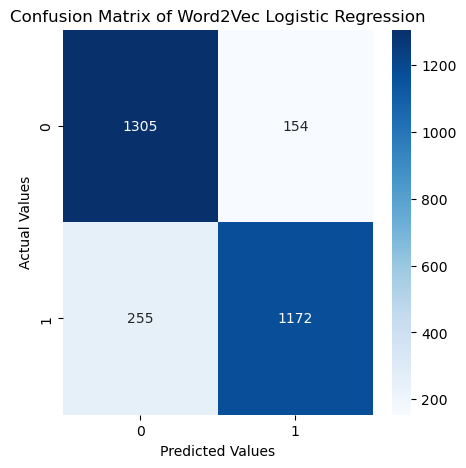

In [11]:
plot_cm(y_test, y_test_pred, "Word2Vec Logistic Regression", [0, 1])